
# What factors made people more likely to survive on the Titanic?

In [26]:
#Basic import statements
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Import the titanic dataset and print length of dataframe
df = pd.read_csv('titanic-data.csv')
print "There are %i rows in the dataframe." % len(df)

There are 891 rows in the dataframe.


In [21]:
#Output the top 20 rows of the dataframe for examination
df.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
#Show the data types for all columns in the dataframe
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

### After a quick examination of the dataframe it appears that the Cabin contains many null values and will not be used in the analysis. In addition, PassengerId is just a unique identifier with no predictive ability. The Name and Ticket features would also appear to be unique identifiers; however, there could be features extracted, but those options will not be explored in this analysis

### For the purpose of this analysis, Pclass, Sex, Sibsp, Parch, and Embarked will be considered classification features while Age and Fare are continuous.

### Note: The correlations and charts featured below remove Null values during operation. Any explicit removal null values will be noted if necessary

In [42]:
#Show basic dataframe statistics
df[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].describe()

,Pclass,Age,SibSp,Parch,Fare
count,891.000000,714.000000,891.000000,891.000000,891.000000
mean,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,20.125000,0.000000,0.000000,7.910400
50%,3.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,38.000000,1.000000,0.000000,31.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200


### The following is shown from the above statistics:
1. At least 75% of the sample were in 2nd or 3rd class.
2. At least 75% of the sample with age data were below ~40 years old with an average of ~30.
3. At least 75% of the sample had one or less sibling/spouse with them.
4. At least 75% of the sample had no parent or child with them.
5. At least 75% of the sample paid 31 or less for their fare with an average of 32.

### Are woman and children first really true?
The first features we will be exploring are Sex and Age.

In [58]:
#A new dataframe is created with the Survived series and dummie columns for Sex
pd.concat([df['Survived'], pd.get_dummies(df['Sex']).rename(columns=lambda x: str(x))], axis=1).corr()

,Survived,female,male
Survived,1.000000,0.543351,-0.543351
female,0.543351,1.000000,-1.000000
male,-0.543351,-1.000000,1.000000


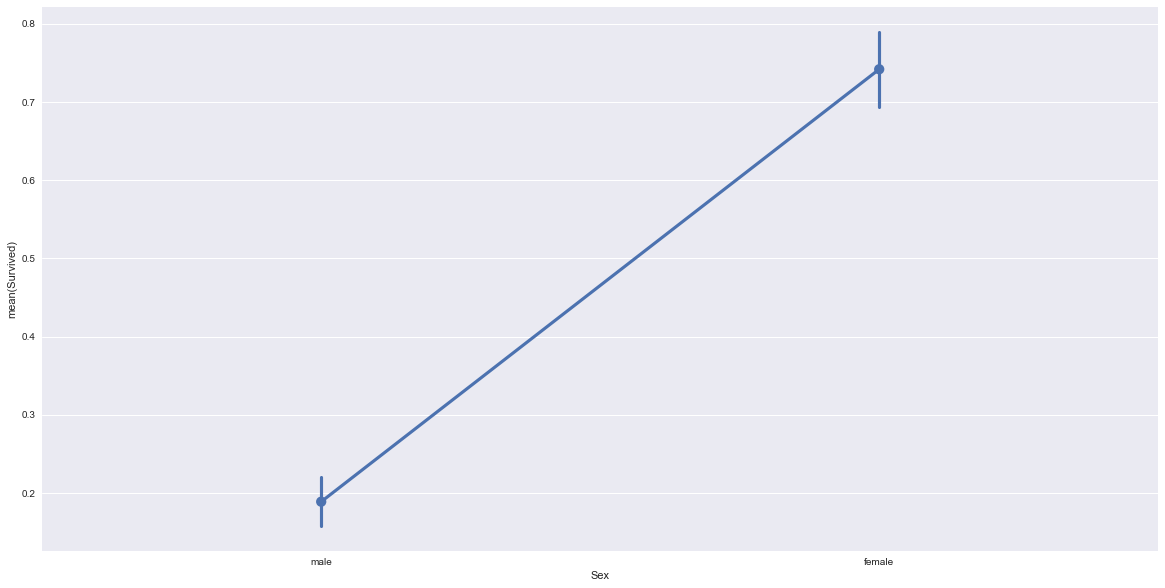

In [50]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.pointplot(x="Sex", y="Survived", data=df);

In [9]:
#A new dataframe is created with the Survived series and dummie columns for Sex
pd.concat([df['Survived'], pd.get_dummies(df['Embarked']).rename(columns=lambda x: str(x))], axis=1).corr()

,Survived,C,Q,S
Survived,1.00000,0.168240,0.003650,-0.155660
C,0.16824,1.000000,-0.148258,-0.778359
Q,0.00365,-0.148258,1.000000,-0.496624
S,-0.15566,-0.778359,-0.496624,1.000000


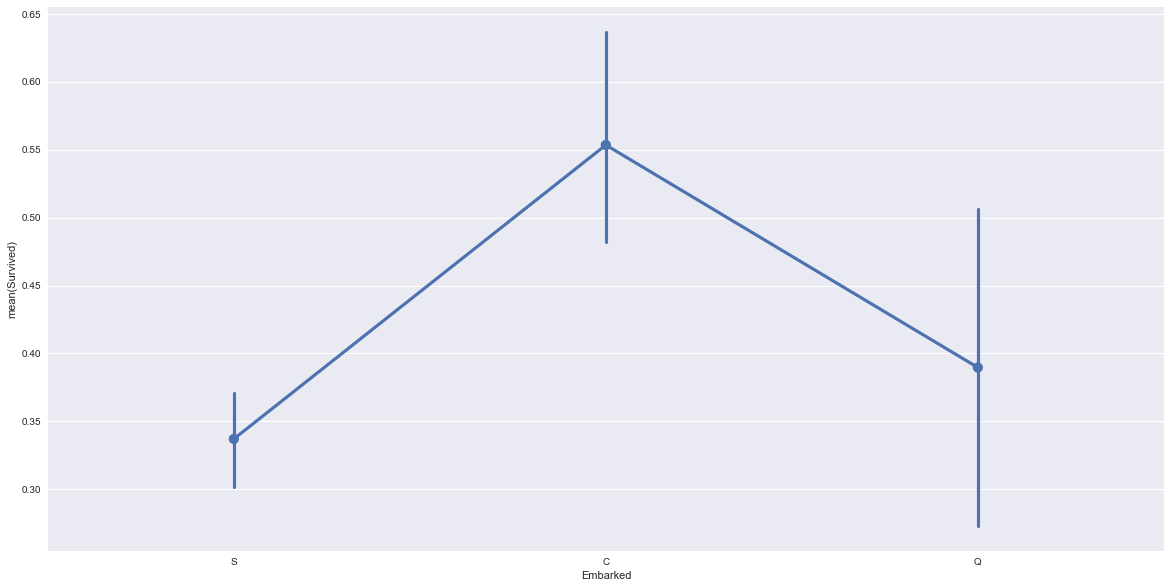

In [51]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.pointplot(x="Embarked", y="Survived", data=df);

In [11]:
#A new dataframe is created with the Survived series and dummie columns for Sex
pd.concat([df['Survived'], pd.get_dummies(df['Pclass']).rename(columns=lambda x: str(x))], axis=1).corr()

,Survived,1,2,3
Survived,1.000000,0.285904,0.093349,-0.322308
1,0.285904,1.000000,-0.288585,-0.626738
2,0.093349,-0.288585,1.000000,-0.565210
3,-0.322308,-0.626738,-0.565210,1.000000


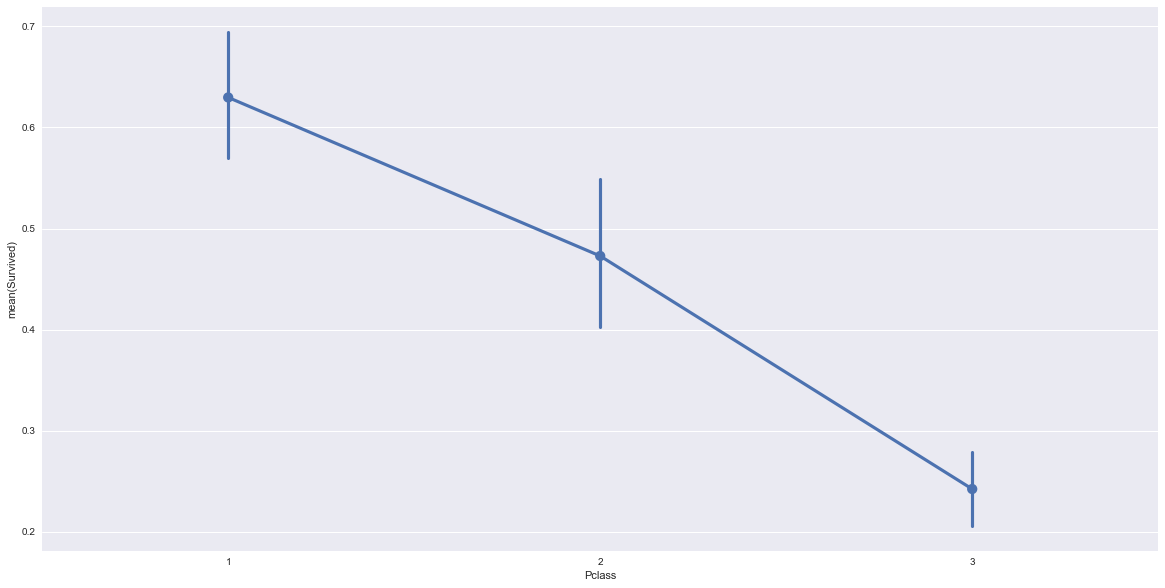

In [52]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.pointplot(x="Pclass", y="Survived", data=df);

In [13]:
#A new dataframe is created with the Survived series and dummie columns for Sex
pd.concat([df['Survived'], pd.get_dummies(df['SibSp']).rename(columns=lambda x: str(x))], axis=1).corr()

,Survived,0,1,2,3,4,5,8
Survived,1.000000,-0.115867,0.173076,0.029796,-0.037215,-0.064123,-0.059292,-0.070234
0,-0.115867,1.000000,-0.811408,-0.264017,-0.198205,-0.210469,-0.110110,-0.130431
1,0.173076,-0.811408,1.000000,-0.099714,-0.074858,-0.079490,-0.041586,-0.049261
2,0.029796,-0.264017,-0.099714,1.000000,-0.024357,-0.025864,-0.013531,-0.016029
3,-0.037215,-0.198205,-0.074858,-0.024357,1.000000,-0.019417,-0.010158,-0.012033
4,-0.064123,-0.210469,-0.079490,-0.025864,-0.019417,1.000000,-0.010787,-0.012778
5,-0.059292,-0.110110,-0.041586,-0.013531,-0.010158,-0.010787,1.000000,-0.006685
8,-0.070234,-0.130431,-0.049261,-0.016029,-0.012033,-0.012778,-0.006685,1.000000


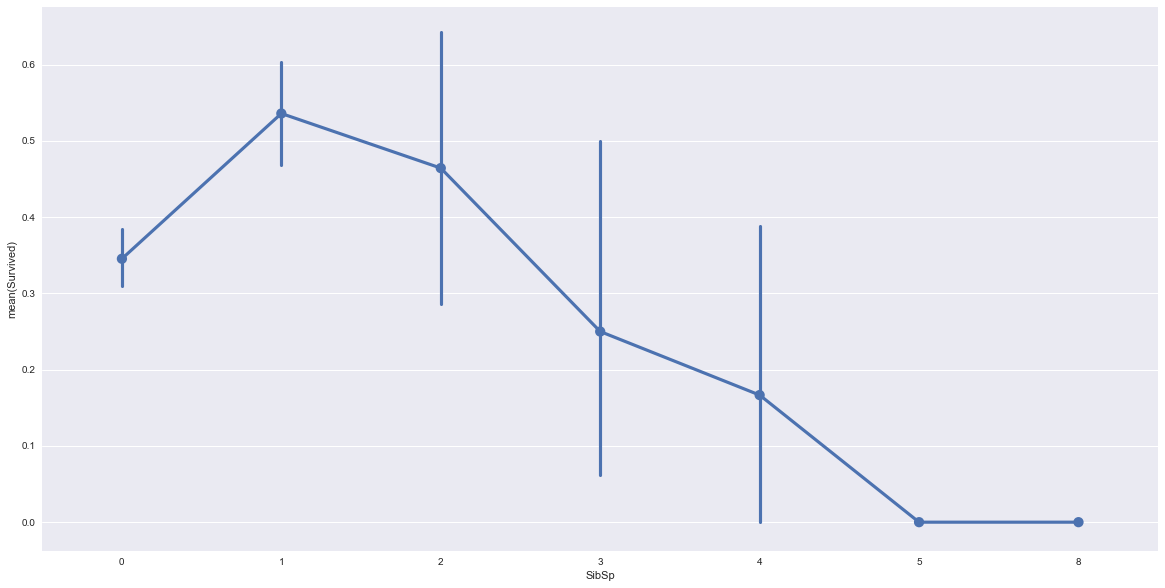

In [54]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.pointplot(x="SibSp", y="Survived", data=df);

In [15]:
#A new dataframe is created with the Survived series and dummie columns for Sex
pd.concat([df['Survived'], pd.get_dummies(df['Parch']).rename(columns=lambda x: str(x))], axis=1).corr()

,Survived,0,1,2,3,4,5,6
Survived,1.000000,-0.147408,0.134174,0.075020,0.033391,-0.053002,-0.028398,-0.026456
0,-0.147408,1.000000,-0.697070,-0.560350,-0.134027,-0.119810,-0.134027,-0.059804
1,0.134174,-0.697070,1.000000,-0.122712,-0.029351,-0.026237,-0.029351,-0.013097
2,0.075020,-0.560350,-0.122712,1.000000,-0.023594,-0.021091,-0.023594,-0.010528
3,0.033391,-0.134027,-0.029351,-0.023594,1.000000,-0.005045,-0.005643,-0.002518
4,-0.053002,-0.119810,-0.026237,-0.021091,-0.005045,1.000000,-0.005045,-0.002251
5,-0.028398,-0.134027,-0.029351,-0.023594,-0.005643,-0.005045,1.000000,-0.002518
6,-0.026456,-0.059804,-0.013097,-0.010528,-0.002518,-0.002251,-0.002518,1.000000


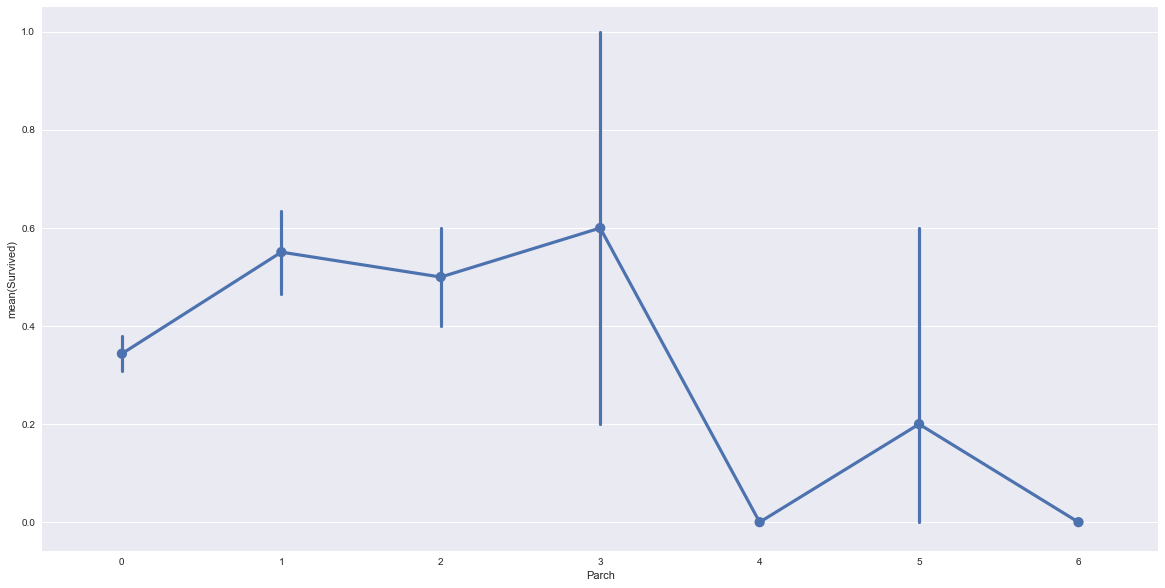

In [55]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.pointplot(x="Parch", y="Survived", data=df);

In [17]:
#Calculate the correlations
df[['Survived', 'Age', 'Fare']].corr()

,Survived,Age,Fare
Survived,1.000000,-0.077221,0.257307
Age,-0.077221,1.000000,0.096067
Fare,0.257307,0.096067,1.000000


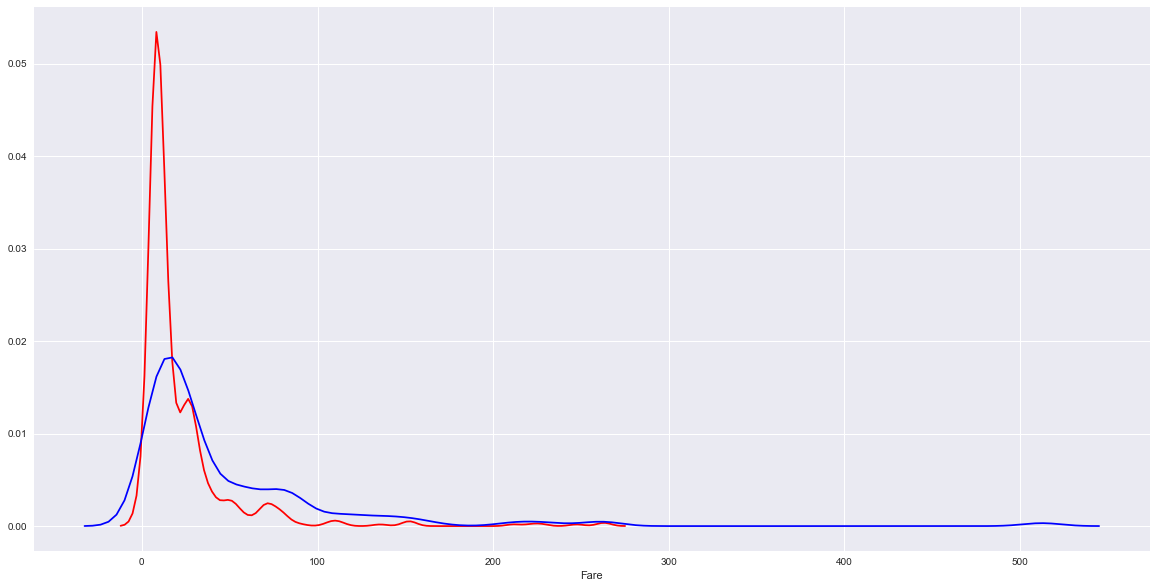

In [56]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.distplot(df[(df['Survived'] == 0) & (df['Fare'].notnull())]['Fare'], hist=False, color="r")
sns.distplot(df[(df['Survived'] == 1) & (df['Fare'].notnull())]['Fare'], hist=False, color="b")

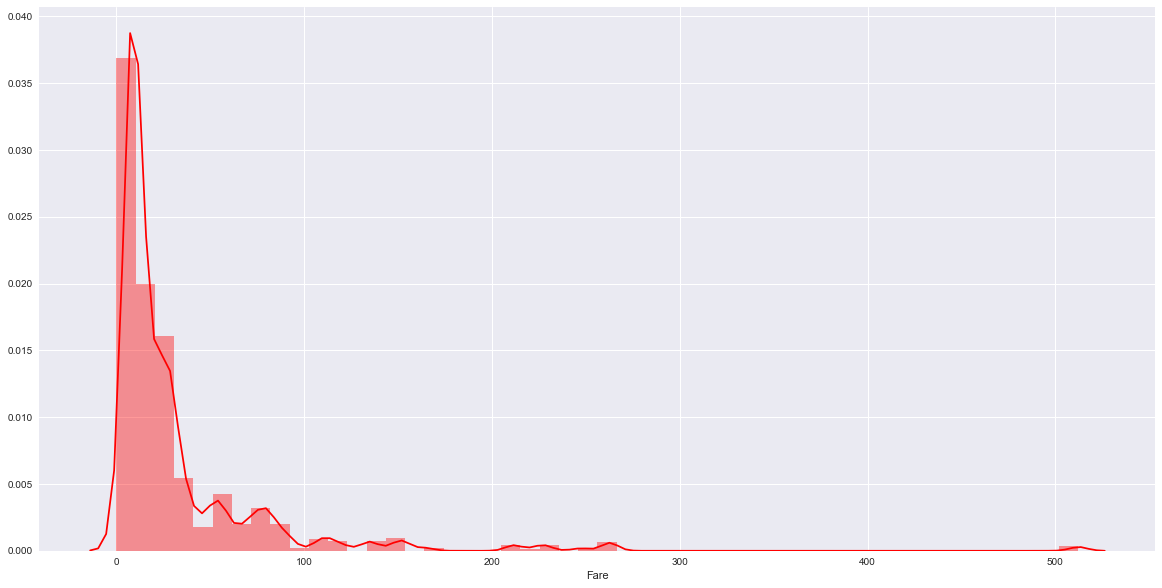

In [49]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.distplot(df[(df['Fare'].notnull())]['Fare'], color="r")

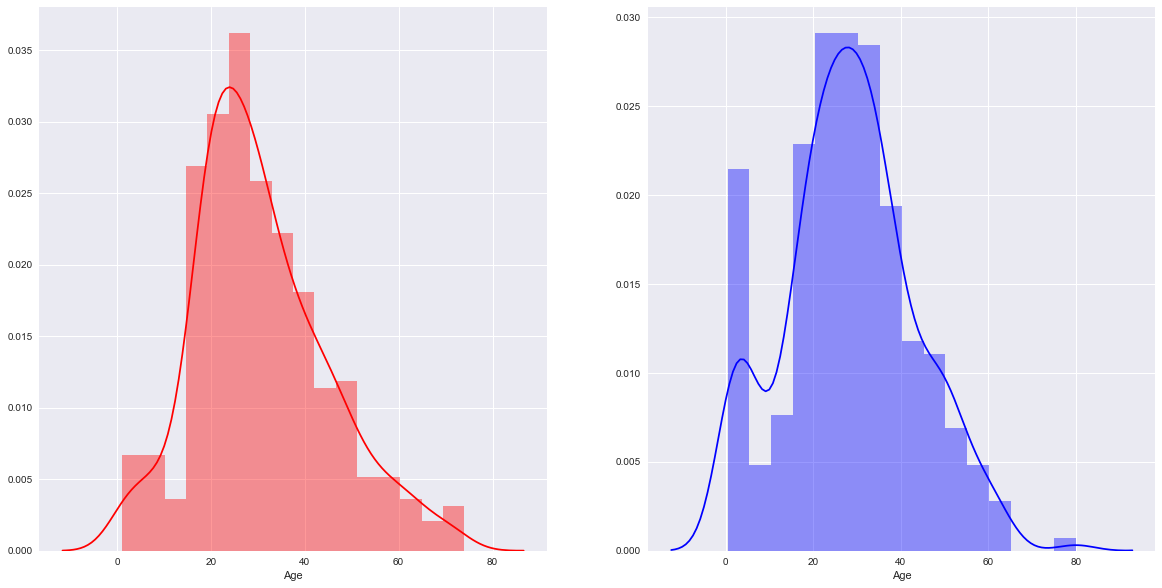

In [48]:
fig, ax =plt.subplots(1,2, figsize=(20, 10))
sns.distplot(df[(df['Survived'] == 0) & (df['Age'].notnull())]['Age'], color="r", ax=ax[0])
sns.distplot(df[(df['Survived'] == 1) & (df['Age'].notnull())]['Age'], color="b", ax=ax[1])

In [40]:
df['honorific'] = df['Name'].str.extract(', (\D+?)\.')

In [41]:
pd.concat([df['Survived'], pd.get_dummies(df['honorific']).rename(columns=lambda x: str(x))], axis=1).corr()

,Survived,Capt,Col,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,the Countess
Survived,1.000000,-0.026456,0.011329,-0.026456,0.008185,-0.026456,0.042470,0.011329,0.085221,0.327093,0.060095,0.042470,-0.549199,0.339040,0.042470,-0.064988,0.042470,0.042470
Capt,-0.026456,1.000000,-0.001590,-0.001124,-0.002983,-0.001124,-0.001124,-0.001590,-0.007267,-0.016983,-0.001590,-0.001124,-0.039411,-0.013541,-0.001124,-0.002760,-0.001124,-0.001124
Col,0.011329,-0.001590,1.000000,-0.001590,-0.004221,-0.001590,-0.001590,-0.002250,-0.010283,-0.024031,-0.002250,-0.001590,-0.055767,-0.019160,-0.001590,-0.003905,-0.001590,-0.001590
Don,-0.026456,-0.001124,-0.001590,1.000000,-0.002983,-0.001124,-0.001124,-0.001590,-0.007267,-0.016983,-0.001590,-0.001124,-0.039411,-0.013541,-0.001124,-0.002760,-0.001124,-0.001124
Dr,0.008185,-0.002983,-0.004221,-0.002983,1.000000,-0.002983,-0.002983,-0.004221,-0.019292,-0.045085,-0.004221,-0.002983,-0.104624,-0.035947,-0.002983,-0.007327,-0.002983,-0.002983
Jonkheer,-0.026456,-0.001124,-0.001590,-0.001124,-0.002983,1.000000,-0.001124,-0.001590,-0.007267,-0.016983,-0.001590,-0.001124,-0.039411,-0.013541,-0.001124,-0.002760,-0.001124,-0.001124
Lady,0.042470,-0.001124,-0.001590,-0.001124,-0.002983,-0.001124,1.000000,-0.001590,-0.007267,-0.016983,-0.001590,-0.001124,-0.039411,-0.013541,-0.001124,-0.002760,-0.001124,-0.001124
Major,0.011329,-0.001590,-0.002250,-0.001590,-0.004221,-0.001590,-0.001590,1.000000,-0.010283,-0.024031,-0.002250,-0.001590,-0.055767,-0.019160,-0.001590,-0.003905,-0.001590,-0.001590
Master,0.085221,-0.007267,-0.010283,-0.007267,-0.019292,-0.007267,-0.007267,-0.010283,1.000000,-0.109844,-0.010283,-0.007267,-0.254903,-0.087580,-0.007267,-0.017851,-0.007267,-0.007267
Miss,0.327093,-0.016983,-0.024031,-0.016983,-0.045085,-0.016983,-0.016983,-0.024031,-0.109844,1.000000,-0.024031,-0.016983,-0.595692,-0.204670,-0.016983,-0.041717,-0.016983,-0.016983
